In [ ]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import regex as re

#data import
game_data = pd.read_csv('data/clean_data.csv')

---
Operating Systems: Processing

In [ ]:
copy_game_data = game_data.copy()
os = copy_game_data[['AppID', 'Name', 'Windows', 'Linux', 'Mac', 'Price']]

#row[3] is windows, row[4] is linux, row[5] is mac

os_count_data = pd.DataFrame()
os_count_data['All'] = []
os_count_data['Windows Only'] = []
os_count_data['Windows and Mac'] = []
os_count_data['Windows and Linux'] = []
os_count_data['Mac and Linux'] = []
os_count_data['Mac Only'] = []
os_count_data['Linux Only'] = []
os_count_data['None'] = []
#os_count_data.insert(0, 'AppID', os['AppID'])
#os_count_data.insert(1, 'Name', os['Name'])

for row in os.itertuples(index = True, name = 'Data'):

    if row[3]==True and row[4]==True and row[5]==True:
        os_count_data.at[len(os_count_data['All']), 'All'] = row[6]

    
    elif row[3]==True and row[4]==False and row[5]==False:
        os_count_data.at[len(os_count_data['Windows Only']), 'Windows Only'] = row[6]

    
    elif row[3]==True and row[4]==False and row[5]==True:
        os_count_data.at[len(os_count_data['Windows and Mac']), 'Windows and Mac'] = row[6]


    elif row[3]==True and row[4]==True and row[5]==False:
        os_count_data.at[len(os_count_data['Windows and Linux']), 'Windows and Linux'] = row[6]


    elif row[3]==False and row[4]==True and row[5]==True:
        os_count_data.at[len(os_count_data['Mac and Linux']), 'Mac and Linux'] = row[6]


    elif row[3]==False and row[4]==False and row[5]==True:
        os_count_data.at[len(os_count_data['Mac Only']), 'Mac Only'] = row[6]


    elif row[3]==False and row[4]==True and row[5]==False:
        os_count_data.at[len(os_count_data['Linux Only']), 'Linux Only'] = row[6]


    elif row[3]==False and row[4]==False and row[5]==False:
        os_count_data.at[len(os_count_data['None']), 'None'] = row[6]

os_count_data.to_csv("data/OS.csv", index=False)

In [ ]:
index = 0
os_count_data.to_csv("data/OS.csv", index=False)
for row in os_count_data.itertuples(index = True, name = 'Data'):
    if (pd.isna(row[1])):
        os_count_data.at[index, 'All'] = 'F'
    if (pd.isna(row[2])):
        os_count_data.at[index, 'Windows Only'] = 'F'
    if (pd.isna(row[3])):
        os_count_data.at[index, 'Windows and Mac'] = 'F'
    if (pd.isna(row[4])):
        os_count_data.at[index, 'Windows and Linux'] = 'F'
    if (pd.isna(row[5])):
        os_count_data.at[index, 'Mac and Linux'] = 'F'
    if (pd.isna(row[6])):
        os_count_data.at[index, 'Mac Only'] = 'F'
    if (pd.isna(row[7])):
        os_count_data.at[index, 'Linux Only'] = 'F'
    if (pd.isna(row[8])):
        os_count_data.at[index, 'None'] = 'F'
    index+=1

print(os_count_data.head())
os_count_data.to_csv("data/OS.csv", index=False)

    All Windows Only Windows and Mac Windows and Linux Mac and Linux Mac Only  \
0     F          0.0               F                 F             F        F   
1     F        14.99               F                 F             F        F   
2  3.99            F               F                 F             F        F   
3     F        23.99               F                 F             F        F   
4     F            F             0.0                 F             F        F   

  Linux Only None  
0          F    F  
1          F    F  
2          F    F  
3          F    F  
4          F    F  


In [ ]:
#replace the TRUE values with the price
os_sep_price = pd.read_csv('data/OS.csv').copy()
x=0
print(game_data.shape[0])
while x != game_data.shape[0]:

    for row in os_sep_price.itertuples(index = True, name = 'Data'):
        
        os_sep_price.loc[x] = os_sep_price.loc[x].replace(to_replace='F', value=None)
    
        x+=1

        if (x == game_data.shape[0]):
            break


print(os_sep_price.head(5))

os_sep_price.to_csv('data/OS2.csv', index=False)

18272
    All Windows Only Windows and Mac Windows and Linux Mac and Linux Mac Only  \
0  None          0.0            None              None          None     None   
1  None        14.99            None              None          None     None   
2  3.99         None            None              None          None     None   
3  None        23.99            None              None          None     None   
4  None         None             0.0              None          None     None   

  Linux Only  None  
0       None  None  
1       None  None  
2       None  None  
3       None  None  
4       None  None  


---
Operating Systems: Analysis

In [ ]:
OS = pd.DataFrame(game_data[['Windows', 'Mac', 'Linux']])

#summary
print(OS.describe())

       Windows    Mac  Linux
count    18272  18272  18272
unique       2      2      2
top       True  False  False
freq     18269  12306  14313


In [ ]:
os_sep_price = pd.read_csv('data/OS2.csv').copy()
print(os_sep_price.describe())

os_sep_price.drop(columns='None', inplace=True)

               All  Windows Only  Windows and Mac  Windows and Linux  \
count  3516.000000  11864.000000      2448.000000         441.000000   
mean      9.668706     11.515802         9.390584           8.391610   
std       8.834423     12.373623        10.558898           8.845871   
min       0.000000      0.000000         0.000000           0.000000   
25%       2.990000      1.990000         1.990000           0.990000   
50%       9.440000      8.990000         6.990000           5.990000   
75%      14.990000     17.990000        14.990000          12.990000   
max     149.990000    134.100000       269.990000          49.990000   

       Mac and Linux  Mac Only  Linux Only  None  
count           1.00       1.0        1.00   0.0  
mean            4.99       0.0       29.99   NaN  
std              NaN       NaN         NaN   NaN  
min             4.99       0.0       29.99   NaN  
25%             4.99       0.0       29.99   NaN  
50%             4.99       0.0       29.99   

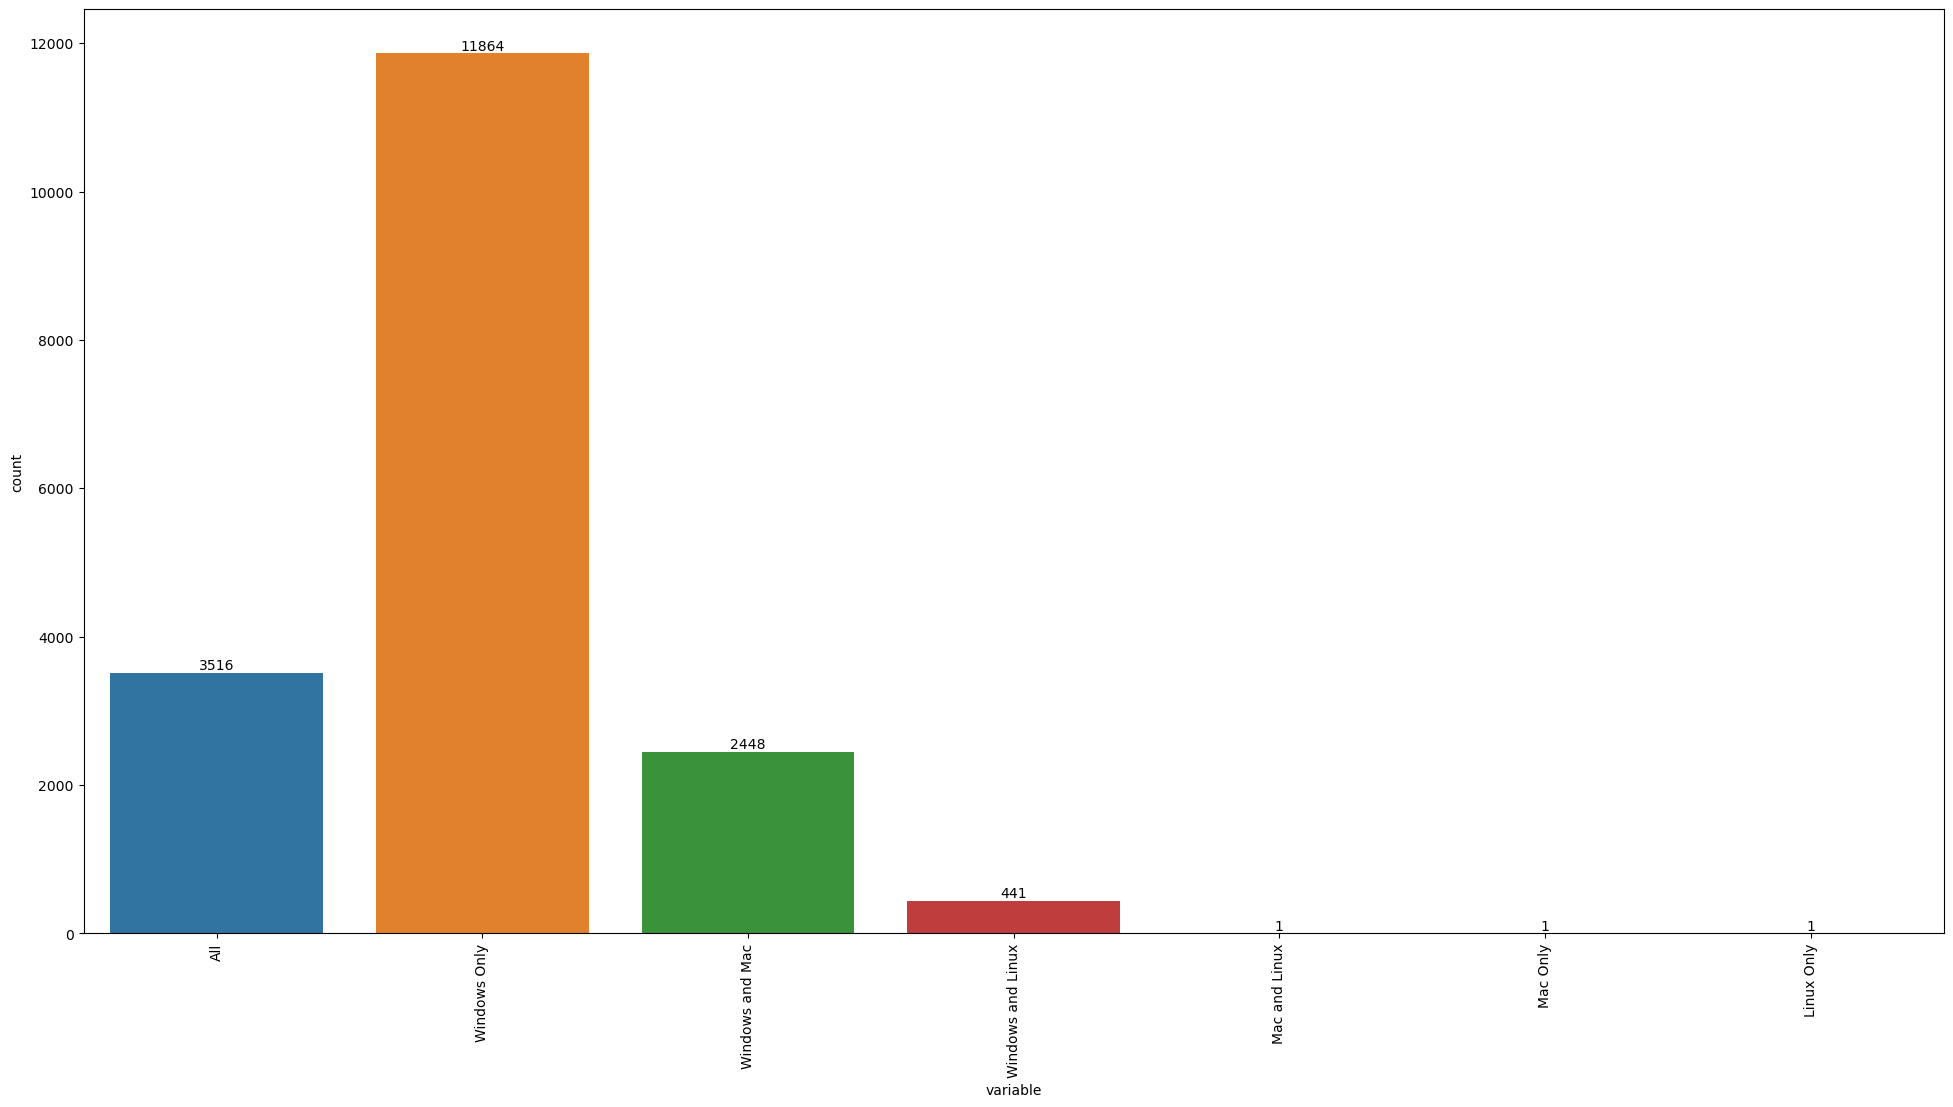

In [ ]:
#countplot of OS
OS_sep = pd.read_csv('data/OS.csv')

OS_sep2 = OS_sep.melt(value_vars=OS_sep.columns)
OS_sep2 = OS_sep2[OS_sep2["value"] != 'F']

f = plt.figure(figsize=(24, 12))

graph = sb.countplot(data=OS_sep2, x="variable")
graph.bar_label(graph.containers[0])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

plt.show()

[Text(0, 0, 'All'),
 Text(1, 0, 'Windows Only'),
 Text(2, 0, 'Windows and Mac'),
 Text(3, 0, 'Windows and Linux'),
 Text(4, 0, 'Mac and Linux'),
 Text(5, 0, 'Mac Only'),
 Text(6, 0, 'Linux Only'),
 Text(7, 0, 'None')]

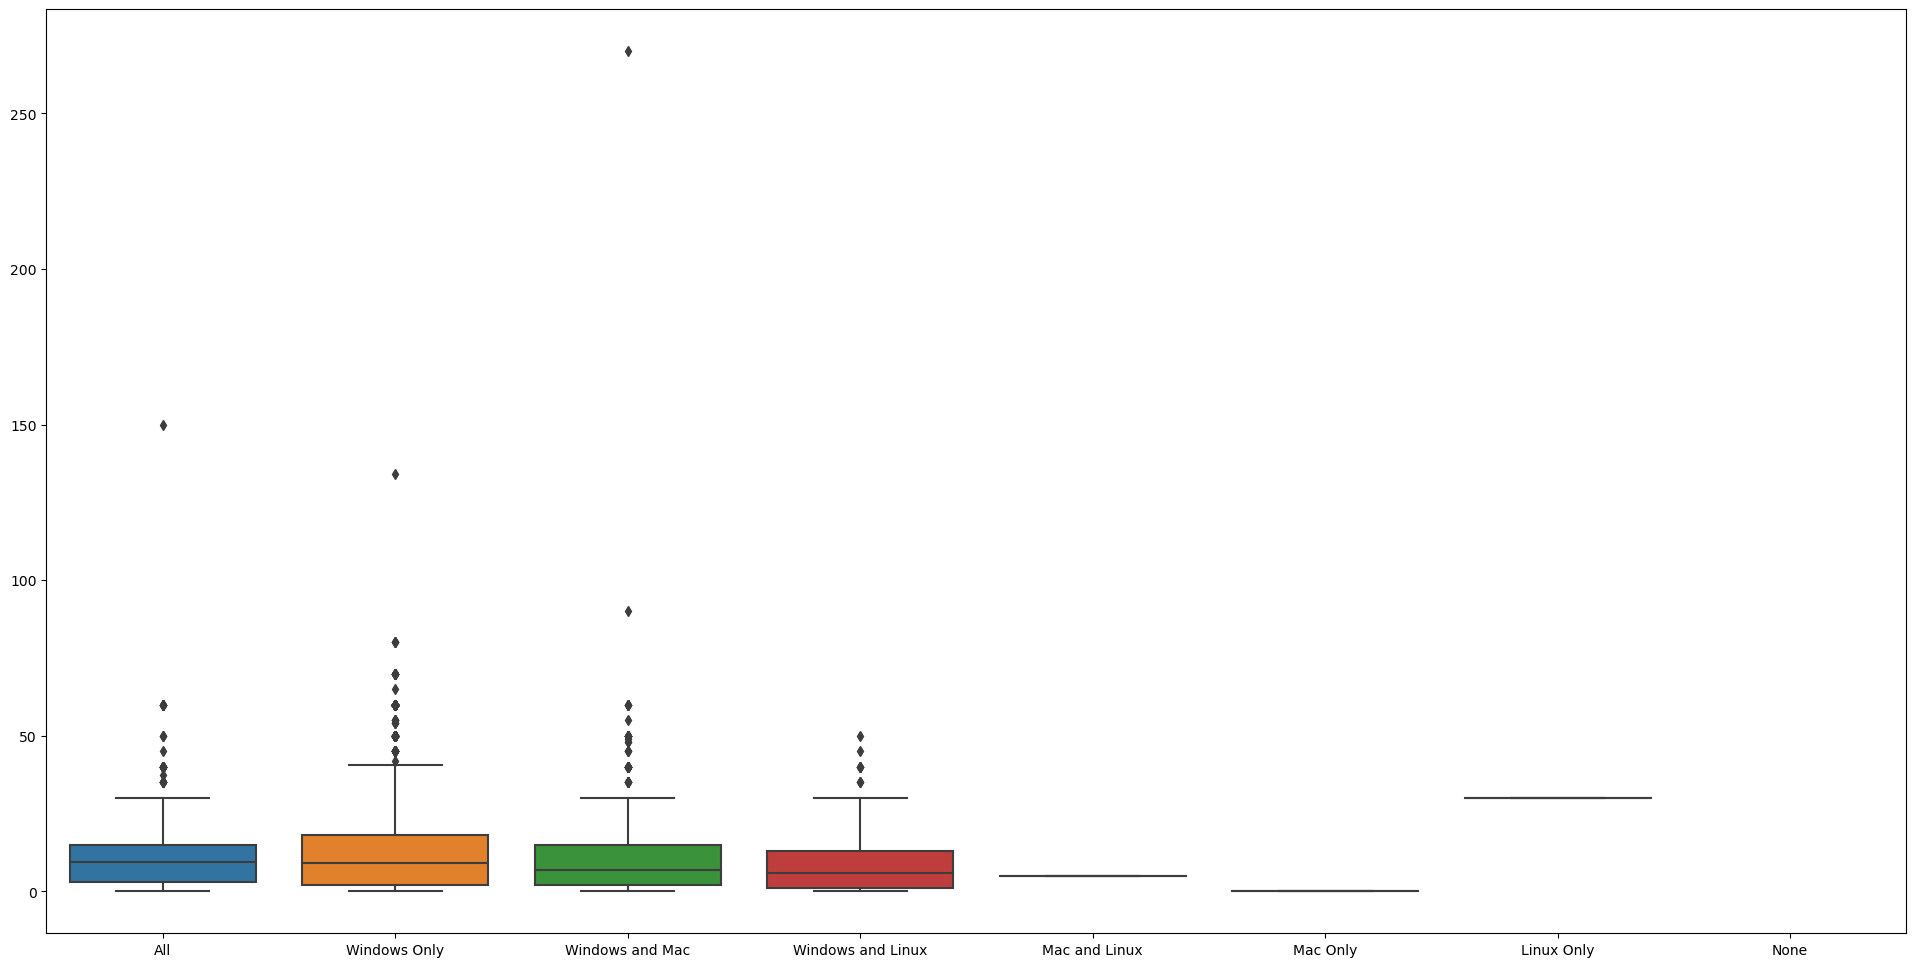

In [ ]:
# boxplots of OS against price
OS_sep = pd.read_csv('data/OS2.csv')

f = plt.figure(figsize=(24, 12))

graph = sb.boxplot(data = OS_sep)

graph.set_xticklabels(graph.get_xticklabels())